# Most Popular Data Science Questions
This project is part of the guided projects available on [Dataquest.io](https://dataquest.io). The task assigmentt is following:

    In this scenario, you're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest. 
    You're tasked with figuring out what is best content to write about. You decide to scource the internet in search for the answer to the question "What is it that people want to learn about in data science?" 
    You decide to investigate Stack Overflow a little more and find out that it is part of a question and answer website network called Stack Exchange. 
    Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science.

## 1. Getting Familiar with the Content of [Data Science Stack Exchange](https://datascience.stackexchange.com)(DSSE)
**What kind of questions are welcomed?**
In the [FAQ section](https://datascience.stackexchange.com/help/asking) there are several tips & tricks on how to ask good questions. **The topics most appropriated** are are concerned with putting **statistical concepts into practice**, focus on **implementation and (business) processes**. Compared with statistics, data science is concerned with implementing whole analytical systems that can ingest (mainly large and diverse) data sets and estimate quantities of interest by incorporating advances from multiple fields. Other relevant Stack Exchange sites inclueds:
- [Cross Validated](https://stats.stackexchange.com) - for statistic questions
- [Stack Overflow](https://stackoverflow.com) - for technical questions
- [Open Data](https://opendata.stackexchange.com) - for datasets requests
- [AI](https://ai.stackexchange.com) - for AI & Machine Learning questions
- [Computational Science](https://scicomp.stackexchange.com) - for questions about software packages and algorithms in applied mathematics

The Help secion also advises what questions are not welcomed. Questions already asked, chatty or open-ended questions should be avoided.


**Sitemap**

The DSSE is divided into two main parts: questions and jobs. The home site is featuring all public questions, where you can filter by tags, users, question status (unanswered), etc. The jobs section redirects to Stack Overflow homepage where jobs are posted.

**Useful features to acomplis the task**

The [tags](https://datascience.stackexchange.com/tags) are usefull to complete our task, as the tags can be sorted by popularity. Also the [questions](https://datascience.stackexchange.com/questions?tab=Votes) section can be sorted out by the number of votes.

**What information is available in each post?**

Choosing the question [Difference between isna() and isnull() in pandas](https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas) each posts contains following information:
- Question
    - date asked
    - activity status
    - number of views
    - number of votes
    - number of bookmarks
    - user who asked the question
    - tags
- Answers
    - date answered
    - number of votes
    - acceptance status (by the person who asked the question)
    - user who answered the question

## 2. Exploring Asked Questions
Stack Exchange provides a public data base for each of its websites. [Here's](https://data.stackexchange.com/datascience/query/new) a link to query and explore Data Science Stack Exchange's database. You can read more about Stack Exchange Data Explorer (SEDE) on its [help section](https://data.stackexchange.com/help) and on [this](https://data.stackexchange.com/tutorial) tutorial link. Writing following query:

    SELECT TOP 10 *
        FROM tags
    ORDER BY Count DESC;

into the SEDE, will return this table:
|TagName|Count|Excerpt|PostIdWikiPostId|
|-----|------|------|-----|
|`machine-learning`|9333|4909|4908|
|`python`|5499|5523|5522|
|`deep-learning`|3994|8956|8955|
|`neural-network`|3804|8885|8884|
|`classification`|2677|4911|4910|
|`keras`|2438|9251|9250|
|`nlp`|1967|147|146|
|`scikit-learn`|1881|5896|5895|
|`tensorflow`|1876|9183|9182|
|`time-series`|1421|8904|8903|

From the SEDE query it seems like the most asked questions on the DSSE are having tags `machine-learning` or `python`. But this table will not tell us anything about the recency of the posts or the overall score (difference between upvotes and downvotes). However the posts table is more promising. Writing following query:

    SELECT  TOP 5 Id, CreationDate, Score, ViewCount, 
                   Tags, AnswerCount, CommentCount, FavoriteCount
     FROM posts
    ORDER BY ViewCount DESC;

Will produce following table:
|Id|CreationDate|Score|ViewCount|Tags|AnswerCount|CommentCount|FavoriteCount|
|-----|--------|------|-----|-----|------|-------|------|
|11928|2016-05-26 04:13:04|81|313104|`python random-forest pandas`|10|2|18|
|893|2014-08-03 13:07:24|108|302601|`r statistics correlation`|1|5|114|
|13490|2016-08-17 09:35:45|222|294783|`deep-learning classification keras weighted-data`|11|0|89|
|12321|2016-06-21 10:05:08|214|292209|`python scikit-learn`|10|4|159|
|33053|2018-06-12 22:34:00|42|273140|`pandas dataframe`|6|4|16|

The data are more relevant to our task. To get the most recent posts we filter out the posts that were created in the year **2021**, with the following query:

    SELECT Id, CreationDate, Score, ViewCount, 
           Tags, AnswerCount, CommentCount, FavoriteCount
      FROM posts
     WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2021;

I have downloaded the result of the query as a .csv and saved it under `2021_questions.csv`

## 3. Exlporing the Data

In [1]:
# packages import
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv("2021_questions.csv", parse_dates=["CreationDate"])
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 8 columns):
Id               4074 non-null int64
CreationDate     4074 non-null datetime64[ns]
Score            4074 non-null int64
ViewCount        4074 non-null int64
Tags             4074 non-null object
AnswerCount      4074 non-null int64
CommentCount     4074 non-null int64
FavoriteCount    311 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 254.8+ KB


The dataframe has 4074 entries, with `FavoriteCount` having some missing values.  The missing values in the `FavoriteCunt` can be replaced with 0 – meaning that the post was not favourited by anyone. The remaining data types are all correct. As for the `Tags` colum, we can split the tags to separate columns or have them as a list within one column, so we can work better with them. The tags are limited to [five](https://meta.stackexchange.com/questions/18878/how-do-i-correctly-tag-my-questions/18879#18879) for each post.

## 4. Cleaning the Data

In [3]:
# Filling the FavoriteCount columns with 0 where NaN values
questions["FavoriteCount"] = questions["FavoriteCount"].fillna(0).astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 8 columns):
Id               4074 non-null int64
CreationDate     4074 non-null datetime64[ns]
Score            4074 non-null int64
ViewCount        4074 non-null int64
Tags             4074 non-null object
AnswerCount      4074 non-null int64
CommentCount     4074 non-null int64
FavoriteCount    4074 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 254.8+ KB


In [4]:
# Splitting the values in the tags column and creating a list
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions["Tags"].head()

0                                     [decision-trees]
1    [machine-learning, python, deep-learning, imag...
2           [neural-network, deep-learning, inception]
3        [machine-learning, cloud, federated-learning]
4                 [reinforcement-learning, openai-gym]
Name: Tags, dtype: object

## 5. Most Used and Most Viewed

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

### 5.1 How Many Times Each Tag Was Used

In [5]:
# counting tags usage
tags_usage = {}

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tags_usage:
            tags_usage[tag] += 1
        else:
            tags_usage[tag] = 1

used_tag = pd.DataFrame.from_dict(tags_usage, orient="index", columns=["Used"])
used_tag.head()

,Used
decision-trees,71
machine-learning,1080
python,748
deep-learning,622
image-classification,113


In [6]:
# sorting the series by the usage of tags & displaying top 10 used tags
most_used = used_tag.sort_values(by="Used", ascending=False).head(10)
most_used

,Used
machine-learning,1080
python,748
deep-learning,622
neural-network,391
keras,352
tensorflow,336
classification,329
nlp,296
time-series,237
scikit-learn,224


In [7]:
print("Sum: ", most_used.sum())

Sum:  Used    4615
dtype: int64


The most used tags are corresponding with our initial findings when exploring the tags table in SEDE.

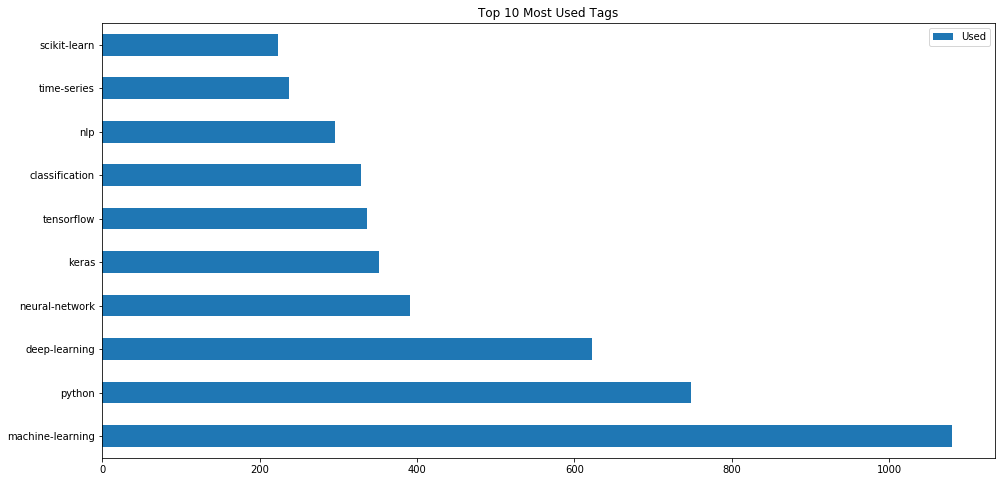

In [8]:
most_used.plot(kind="barh", figsize=(16,8))
plt.title("Top 10 Most Used Tags")
plt.show()

The most used tags are `machine-learning` and `python` together with `deep-learning`. In first half of the 2021 the those three tags are occupying 53% of the total used tags.

### 5.1 How Many Times Each Tag Was Viewed

In [9]:
# counting tags views
tags_views = {}

for index, row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in tags_views:
            tags_views[tag] += row["ViewCount"]
        else:
            tags_views[tag] = row["ViewCount"]

view_tag = pd.DataFrame.from_dict(tags_views, orient="index", columns=["Viewed"])
view_tag.head()

,Viewed
decision-trees,2425
machine-learning,43885
python,54033
deep-learning,27851
image-classification,5893


In [10]:
# sorting the series by the views of tags & displaying top 10 viewed tags
most_viewed = view_tag.sort_values(by="Viewed", ascending=False).head(10)
most_viewed

,Viewed
python,54033
machine-learning,43885
deep-learning,27851
keras,25587
tensorflow,25221
scikit-learn,18646
pandas,16972
nlp,14531
neural-network,14264
numpy,13603


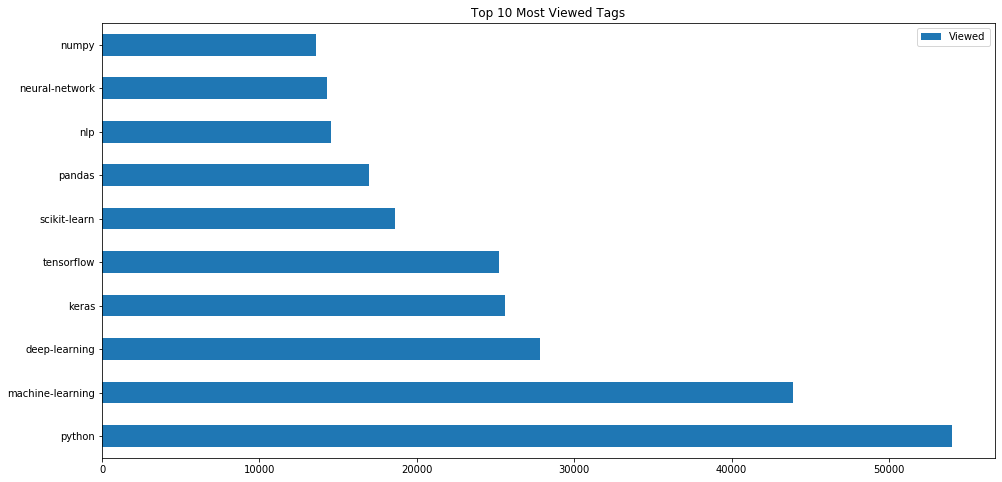

In [11]:
most_viewed.plot(kind="barh", figsize=(16,8))
plt.title("Top 10 Most Viewed Tags")
plt.show()

In [12]:
# merging the two dataframes to compare the findings
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

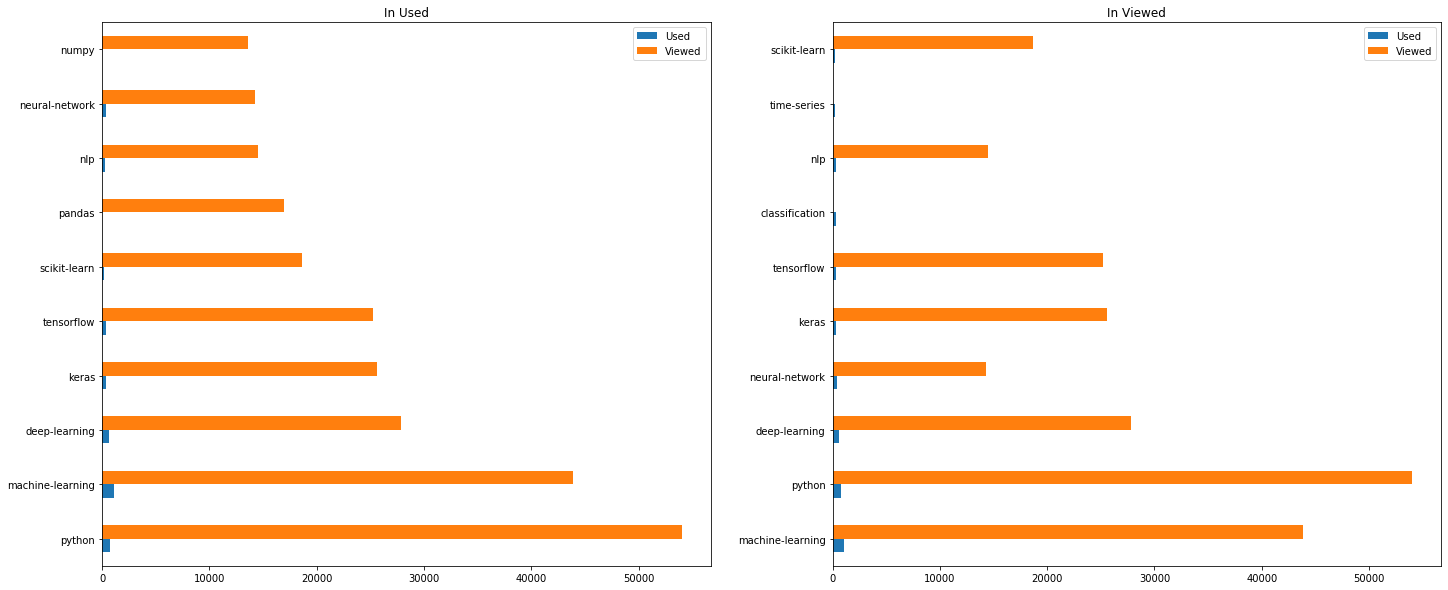

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
in_used.plot(kind="barh", ax=axes[1])
axes[0].set_title('In Used')
in_viewed.plot(kind="barh", ax=axes[0])
axes[1].set_title('In Viewed')
plt.show()

In [14]:
# printing the in_used dataframe
in_used

,Used,Viewed
machine-learning,1080,43885.0
python,748,54033.0
deep-learning,622,27851.0
neural-network,391,14264.0
keras,352,25587.0
tensorflow,336,25221.0
classification,329,NaN
nlp,296,14531.0
time-series,237,NaN
scikit-learn,224,18646.0


In [15]:
# printing the in_viewed dataframe
in_viewed

,Used,Viewed
python,748.0,54033
machine-learning,1080.0,43885
deep-learning,622.0,27851
keras,352.0,25587
tensorflow,336.0,25221
scikit-learn,224.0,18646
pandas,NaN,16972
nlp,296.0,14531
neural-network,391.0,14264
numpy,NaN,13603


Comparing the two charts we can see that the top three used tags `python`, `machine-learning` and `deep-learning` are also the top 3 viewed. Then the results differ. The following top viewed tag is `neural-network` that is actually the 9th most used. Meaning people are viewing the `neural-network` but are not used that much.

There are also tags that are part of the *used* dataframe, but are missing the views. Meaning, people are using the tags, but the tag views are missing.
- `classification`
- `time-series`

The opposite case, the tags are viewed, but not used:
- `pandas`
- `numpy`

## 6. Relations Between Tags
Are there any relations between the tags? One way how to tackle this is creating tag pairs, to see what tags are often used together.

In [16]:
# Creating list of all used tags
all_tags = list(tags_usage)

# creating associations dataframe where each row and column represents the used tag
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,decision-trees,machine-learning,python,deep-learning
decision-trees,NaN,NaN,NaN,NaN
machine-learning,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in `questions["Tags"]`, we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [17]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

associations.iloc[0:4,0:4]

,decision-trees,machine-learning,python,deep-learning
decision-trees,71,10,13,1
machine-learning,10,1080,169,218
python,13,169,748,65
deep-learning,1,218,65,622


As the result is containg all the used tags and size is too big, let's examine only the most used tags.

In [18]:
relations_most_used = associations.loc[most_used.index, most_used.index]
relations_most_used

,machine-learning,python,deep-learning,neural-network,keras,tensorflow,classification,nlp,time-series,scikit-learn
machine-learning,1080,169,218,122,46,55,127,61,45,64
python,169,748,65,39,90,88,43,62,52,89
deep-learning,218,65,622,127,93,90,36,41,31,5
neural-network,122,39,127,391,57,41,23,14,15,6
keras,46,90,93,57,352,176,12,12,24,10
tensorflow,55,88,90,41,176,336,9,18,13,4
classification,127,43,36,23,12,9,329,18,21,23
nlp,61,62,41,14,12,18,18,296,1,12
time-series,45,52,31,15,24,13,21,1,237,4
scikit-learn,64,89,5,6,10,4,23,12,4,224


In [19]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

relations_most_used

,machine-learning,python,deep-learning,neural-network,keras,tensorflow,classification,nlp,time-series,scikit-learn
machine-learning,NaN,169.0,218.0,122.0,46.0,55.0,127.0,61.0,45.0,64.0
python,169.0,NaN,65.0,39.0,90.0,88.0,43.0,62.0,52.0,89.0
deep-learning,218.0,65.0,NaN,127.0,93.0,90.0,36.0,41.0,31.0,5.0
neural-network,122.0,39.0,127.0,NaN,57.0,41.0,23.0,14.0,15.0,6.0
keras,46.0,90.0,93.0,57.0,NaN,176.0,12.0,12.0,24.0,10.0
tensorflow,55.0,88.0,90.0,41.0,176.0,NaN,9.0,18.0,13.0,4.0
classification,127.0,43.0,36.0,23.0,12.0,9.0,NaN,18.0,21.0,23.0
nlp,61.0,62.0,41.0,14.0,12.0,18.0,18.0,NaN,1.0,12.0
time-series,45.0,52.0,31.0,15.0,24.0,13.0,21.0,1.0,NaN,4.0
scikit-learn,64.0,89.0,5.0,6.0,10.0,4.0,23.0,12.0,4.0,NaN


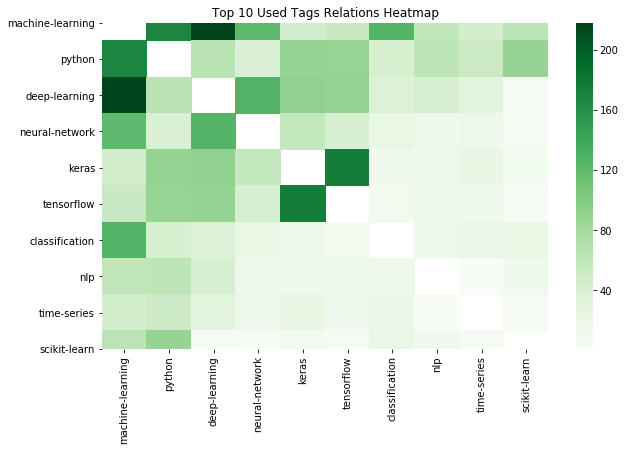

In [20]:
plt.figure(figsize=(10,6))
plt.title("Top 10 Used Tags Relations Heatmap")
sns.heatmap(relations_most_used, cmap="Greens", annot=False)
plt.show()

The most used tags also have the strongest relationship. `deep-learning` with `machine-learning` and both tags relates to `python`. Secon cluster is with `tensorflow` and `keras`. However the relationships above does not have to necessary mean that the tags are having a strong relationship. 

## 7. Just a phase?
Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down? Let's go back to SEDE and get all the questions, using the following query:

    SELECT Id, CreationDate, Tags
      FROM posts
     WHERE PostTypeId = 1;
    
The result is saved in the `all_questions.csv` document. Let's read in the document and repeat the cleaning.

In [21]:
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29698 entries, 0 to 29697
Data columns (total 3 columns):
Id              29698 non-null int64
CreationDate    29698 non-null datetime64[ns]
Tags            29698 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 696.2+ KB


In [22]:
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "").str.split("><")

Before moving on, let's decide what tags should be determined as the deep learning tags. The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]. This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [23]:
dl_list = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

def is_deep_learning(tags):
    for tag in tags:
        if tag in dl_list:
            return 1
        else:
            return 0

In [24]:
all_questions["DeepLearning"] = all_questions["Tags"].apply(is_deep_learning)
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning
10758,8744,2015-11-06 17:41:28,"[machine-learning, naive-bayes-classifier]",0
19106,10622,2016-03-09 17:10:16,"[r, predictive-modeling, logistic-regression, ...",0
21046,93515,2021-04-25 07:55:11,"[deep-learning, convolutional-neural-network, ...",1
29139,73093,2020-04-27 16:08:00,"[machine-learning, python, keras, tensorflow, ...",0
15448,31259,2018-05-05 16:26:11,"[neural-network, lstm]",1


Let's now group the findings by quarter and count how often the deep learning tags were used.

In [25]:
def quarter(datetime):
    year = str(datetime.year)
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y} Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(quarter)
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning,Quarter
9388,65736,2020-01-02 15:31:29,"[keras, tensorflow]",1,2020 Q1
8157,89297,2021-02-12 16:44:24,"[deep-learning, neural-network, keras, recomme...",1,2021 Q1
27883,72296,2020-04-14 11:56:14,"[tensorflow, confidence]",1,2020 Q2
18211,20354,2017-07-11 16:08:00,[statistics],0,2017 Q3
754,51893,2019-05-13 14:19:18,"[deep-learning, optimization, pytorch, gan]",1,2019 Q2


For the final stretch of this screen, we'll group by quarter and:

- Count the number of deep learning questions.
- Count the total number of questions.
- Compute the ratio between the two numbers above.

In [26]:
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = (quarterly["DeepLearningQuestions"]/quarterly["TotalQuestions"])*100
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
7,2016 Q1,39,511,7.632094
10,2016 Q4,78,518,15.057915
23,2020 Q1,319,1781,17.911286
17,2018 Q3,315,1461,21.560575
3,2015 Q1,5,188,2.659574


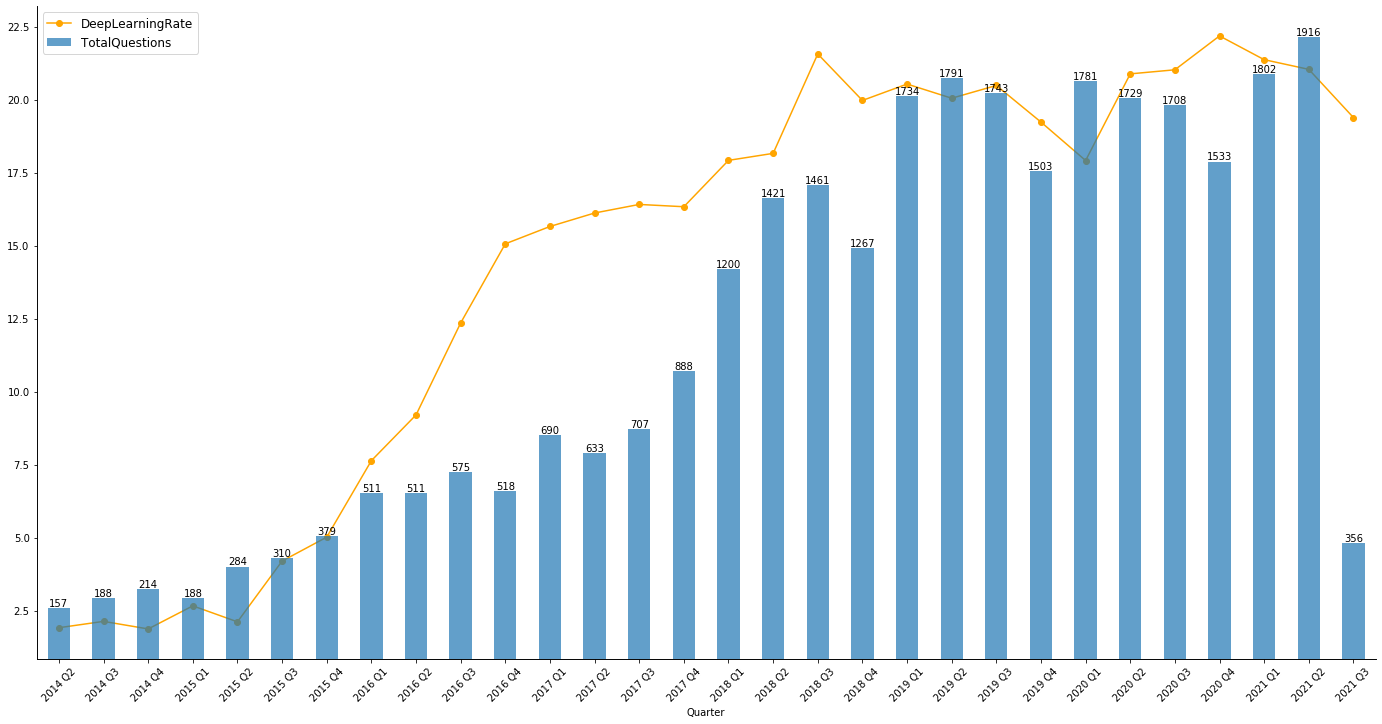

In [27]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                    kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45
                    )

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

handles2, labels2 = ax2.get_legend_handles_labels()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

The deep learning related posts are steadily growing with no drastic drops.